In [1]:
#IMPORTING LIBRARIES AND DATASETS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# IMPORTING THE FILTERED GENOTYPIC DATA
ATLAS_Dataset = pd.read_csv('atlas_2024_genes.csv')

# FILTER OUT THE DATA OF EACH CONTINENT FOR CONTINENT-BASED ANALYSES
Africa = ATLAS_Dataset[ATLAS_Dataset['Continents'] == 'Africa']
Europe = ATLAS_Dataset[ATLAS_Dataset['Continents'] == 'Europe']
North_America = ATLAS_Dataset[ATLAS_Dataset['Continents'] == 'North America']
South_America = ATLAS_Dataset[ATLAS_Dataset['Continents'] == 'South America']
Asia = ATLAS_Dataset[ATLAS_Dataset['Continents'] == 'Asia']
Oceania = ATLAS_Dataset[ATLAS_Dataset['Continents'] == 'Oceania']

In [2]:
#TIME SERIES VISUALIZATION OF GENOTYPIC DATA RECORDED FOR SELECTED SPECIES AND GENOTYPE(S)

# Function to visualize the time series trend of specific AMR genes for a given species
def genotype_trendline(df, species, gene_list):

    # Filter the DataFrame for the specified species and genes
    df_filtered = df[(df['Species'] == species) & (df['Gene'].isin(gene_list))]

    # Group the filtered data by year and gene, and count the occurrences of each
    df_aggregated = df_filtered.groupby(['Year', 'Gene']).size().reset_index(name='Count')

    # Create a pivot table with years as the rows and genes as the columns
    pivot_table = df_aggregated.pivot_table(index='Year', columns='Gene', values='Count', aggfunc='sum', fill_value=0)

    # Reset the index of the pivot table to prepare for melting
    pivot_table = pivot_table.reset_index()

    # Melt the pivot table to transform it into a long format suitable for seaborn plotting
    melted_df = pivot_table.melt(id_vars=['Year'], var_name='Gene', value_name='Count')

    # Plot the line graph to visualize trends in gene occurrences over the years
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=melted_df, x='Year', y='Count', hue='Gene', markers=True, dashes=False)

    # Add titles and labels to the plot
    plt.title(f'Trendline of AMR Genes Recorded for {species}')
    plt.xlabel('Year')
    plt.ylabel('Count of AMR Genes')

    # Display the legend outside the plot for better readability
    plt.legend(title='Gene', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add grid lines to the plot for easier interpretation of trends
    plt.grid(True)

    # Adjust the layout
    plt.tight_layout()

    # Display the plot
    plt.show()

Test run:
genotype_trendline(ATLAS_Dataset,'Escherichia coli',['CTXM9','SHV','TEM'])

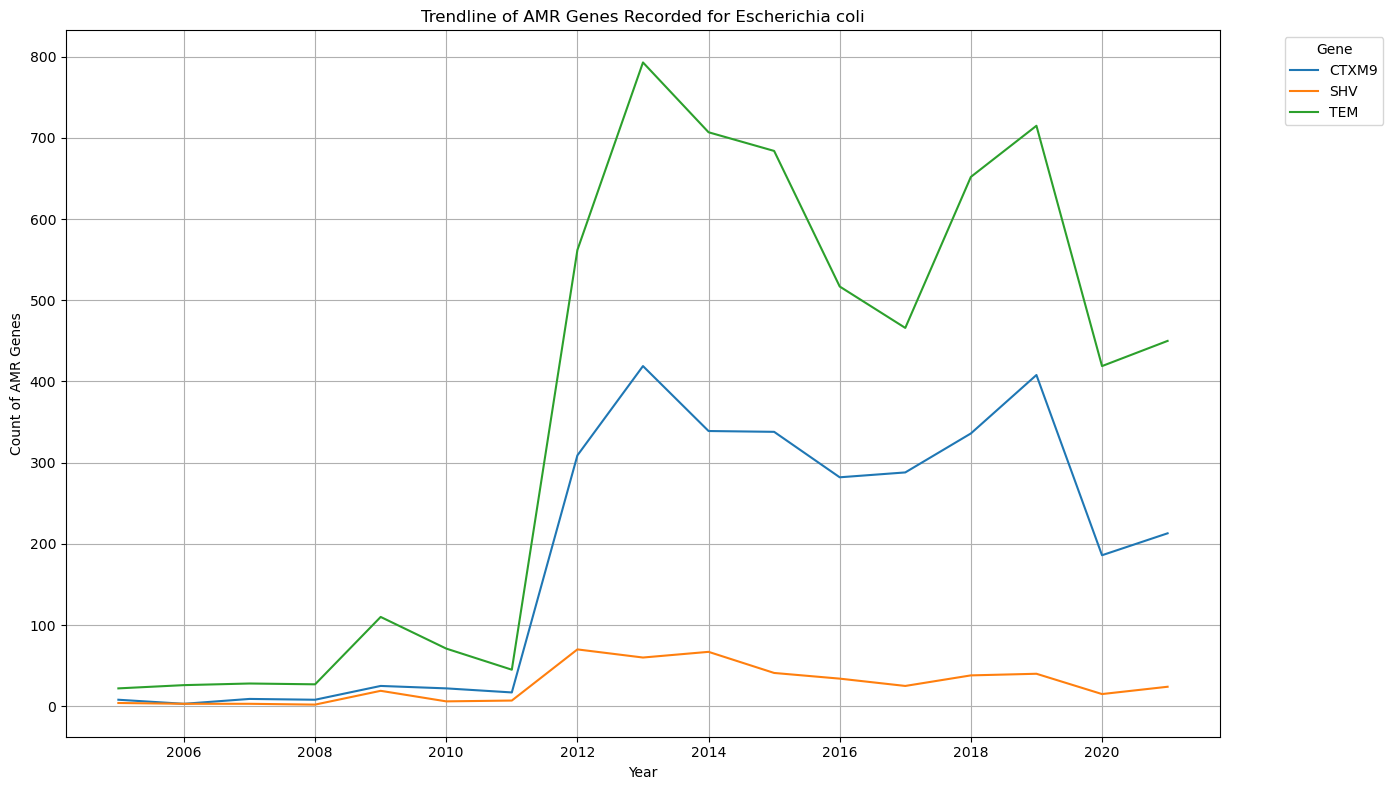

In [3]:
genotype_trendline(ATLAS_Dataset,'Escherichia coli',['CTXM9','SHV','TEM'])